Cost at initial theta (zeros): 0.693
Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Cost at theta found by optimize.minimize: 0.203
theta:
	[-25.161, 0.206, 0.201]
For a student with scores 45 and 85,we predict an admission probability of 0.776
Train Accuracy: 83.1 %


C:\Users\PC\AppData\Local\Temp\ipykernel_12192\732266951.py:325: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,
C:\Users\PC\AppData\Local\Temp\ipykernel_12192\732266951.py:401: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res_lambda1 = optimize.minimize(costFunctionReg,
C:\Users\PC\AppData\Local\Temp\ipykernel_12192\732266951.py:410: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res_lambda10 = optimize.minimize(costFunctionReg,
C:\Users\PC\AppData\Local\Temp\ipykernel_12192\732266951.py:419: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res_lambda0 = optimize.minimize(costFunctionReg,


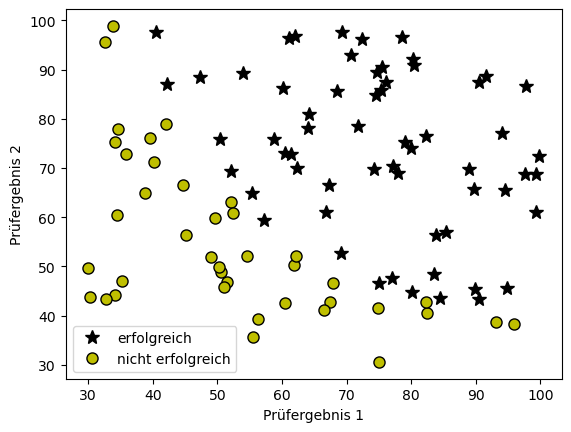

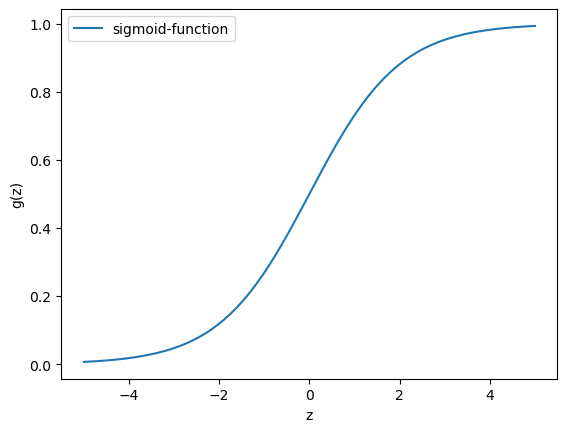

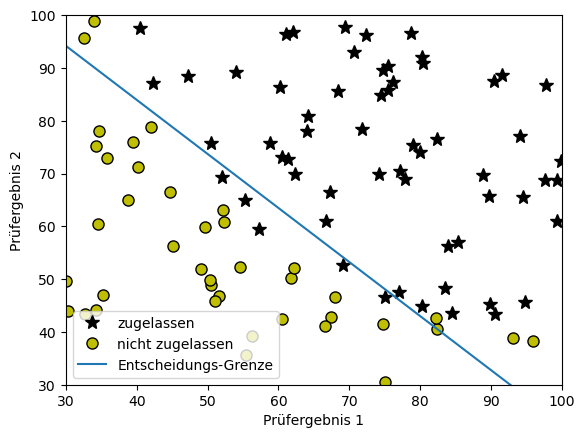

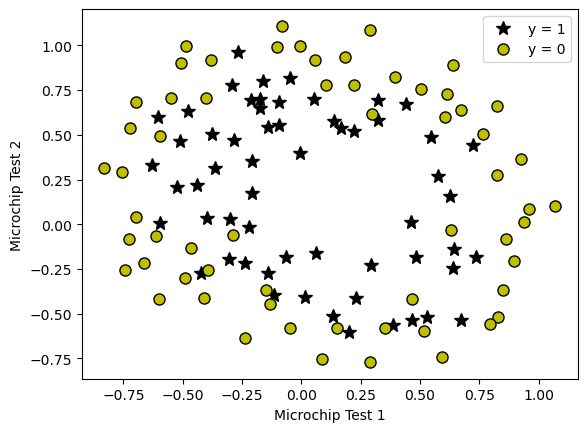

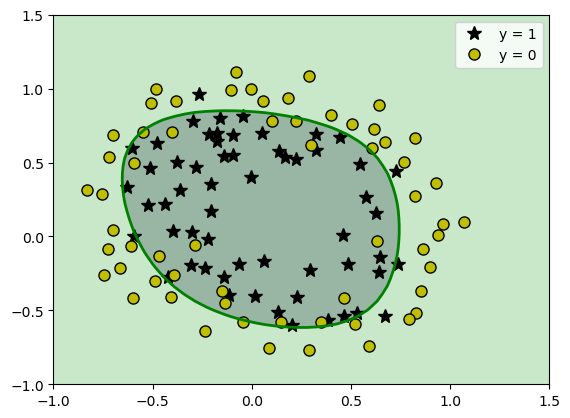

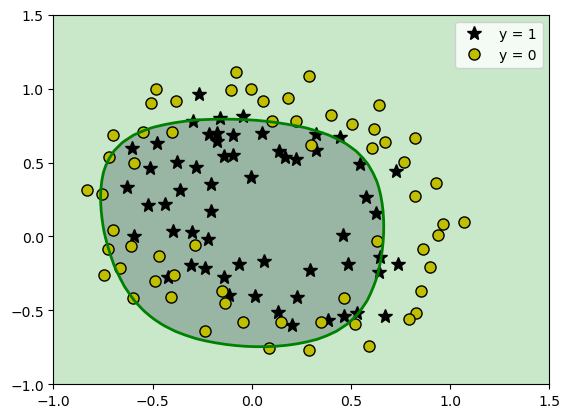

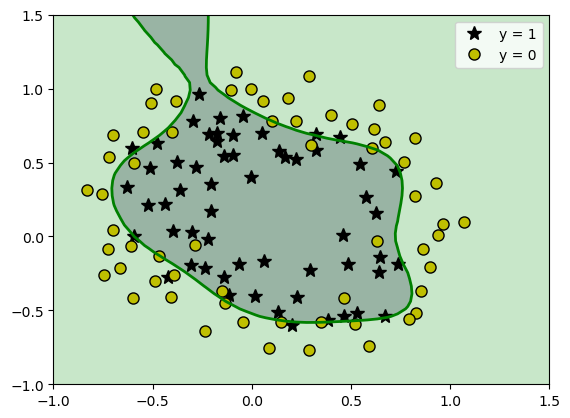

In [2]:
# Logistic Regression Methods

# IMPORT LIBRARIES------------------

import os # used for manipulating directory paths
import numpy as np # Scientific and vector computation for python
from scipy import optimize # Optimization module in scipy
from matplotlib import pyplot #plotting

#allows the output of matplotlib plots to be displayed directly in the notebook
%matplotlib inline

#LINEAR CLASSIFICATION WITH 1 FEATURE------------------


def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset. 
    
    y : vector_like
        Label values for the dataset. A vector of size (M, ).   
    """
    # Create New Figure
    fig = pyplot.figure()
    
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    return
  
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    g= 1/(1+np.exp(-z))

    return g

def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : vector_like
        The parameters for logistic regression of shape (d+1,).
    
    X : array_like
        The input dataset of shape (m x d+1) where m is the total number
        of data points and d is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : vector_like
        Labels for the of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad :  vector_like
        A vector of shape (m+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    """
    
    # Initialize some useful values
    m = y.size  # number of training examples
    h = sigmoid(np.dot(X,theta))
    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    
    J = (-1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
    grad = (1/m)*np.dot(X.T, (h-y))
    return J, grad

def plotDecisionBoundary(plotData, theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Plots the data points with * for the positive examples and o for  the negative examples.

    Parameters
    ----------

    theta : vector_like
        The parameters for logistic regression of shape (d+1,).

    X : array_like
        The input dataset of shape (m x d+1) where m is the total number
        of data points and d is the number of features. 

    y : vector_like
        Vector of data labels of shape (m, ).
    """
    # make sure theta is a numpy array
    theta = np.array(theta)

    # Plot Data (remember first column in X is the intercept)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        pyplot.plot(plot_x, plot_y)

        # Legend
        pyplot.legend(['zugelassen', 'nicht zugelassen', 'Entscheidungs-Grenze'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                theta_shape = theta.shape            
                mapped_feature = mapFeature(np.array([[ui]]), np.array([[vj]]))

                
                z[i, j] = np.dot(mapped_feature, theta)


        z = z.T  # important to transpose z before calling contour
        
        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)
        
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : vector_like
        The parameters for logistic regression of shape (d+1,).
    
    X : array_like
        The input dataset of shape (m x d+1) where m is the total number
        of data points and d is the number of features. 

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X. 
    """
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)
    threshold = 0.5
    
    h = sigmoid(np.dot(X,theta))
    p = (h>= threshold).astype(int)

    return p        

def mapFeature(X1, X2, degree=6):
    """
    Maps two input features X1 and X2 to polynomial features up to the given degree.

    Parameters:
        X1 (float or array-like): Feature vector 1 or single scalar value.
        X2 (float or array-like): Feature vector 2 or single scalar value.
        degree (int): The maximum degree of the polynomial features. Default is 6.

    Returns:
        out (numpy.ndarray): A new feature vector with polynomial features.
    """
    # Convert scalar values to 1-element arrays to maintain consistency
    if np.isscalar(X1):
        X1 = np.array([X1])
    if np.isscalar(X2):
        X2 = np.array([X2])

    m = len(X1)
    out = np.ones((m, 1))  # Initialize with a column of ones for the bias term

    for i in range(1, degree + 1):
        for j in range(i + 1):
            if np.isscalar(X1) and np.isscalar(X2):
                # Handle scalar inputs
                feature = (X1 ** (i - j)) * (X2 ** j)
            else:
                # Generate the polynomial feature by taking the power of X1 and X2
                # and multiplying them together with appropriate coefficients.
                feature = (X1 ** (i - j)) * (X2 ** j)
            
            out = np.hstack((out, feature.reshape(-1, 1)))

    return out

def costFunctionReg(theta, X, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.
    
    Parameters
    ----------
    theta : vector_like
        The parameters for logistic regression of shape (d+1,).
    
    X : array_like
        The input dataset of shape (m x d+1) where m is the total number
        of data points and d is the number of features. 
    
    y : vector_like
        The data labels of shape (m, ).
    
    lambda_ : float
        The regularization parameter. 
    
    Returns
    -------
    J : float
        The computed value for the regularized cost function. 
    
    grad : vector_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples
    
    # Compute the sigmoid of X * theta
    z = X.dot(theta)
    h = sigmoid(z)

    # Compute the regularized cost J
    J = (-1/m) * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
    J += (lambda_ / (2*m)) * np.sum(np.square(theta[1:]))  # Regularization term
    
    # Compute the gradient
    grad = (1/m) * X.T.dot(h - y)
    grad[1:] += (lambda_ / m) * theta[1:]  # Regularization term for j > 0
    
    return J, grad

# Test the Code

#Load the data from the Textfile 'data1.txt'

# The first two columns contains the exam scores and the third column
# contains the label.
data = np.loadtxt(os.path.join('Data', 'data_logr.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]


# Plot the data examples
plotData(X,y)    
pyplot.xlabel('Prüfergebnis 1')
pyplot.ylabel('Prüfergebnis 2')
pyplot.legend(['erfolgreich', 'nicht erfolgreich'])
pyplot.savefig('data.png')

# plot the sigmoid
z = np.linspace(-5, 5, 200)
fig = pyplot.figure()
pyplot.plot(z,sigmoid(z)) 
pyplot.xlabel('z')
pyplot.ylabel('g(z)')
pyplot.savefig('sigmoid.png')
pyplot.legend(['sigmoid-function'])

# Setup the data matrix appropriately and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))


# set options for optimize.minimize
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta 
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))

# Plot Boundary
plotDecisionBoundary(plotData, theta, X, y)
pyplot.xlabel('Prüfergebnis 1')
pyplot.ylabel('Prüfergebnis 2')
pyplot.savefig('datafit.png')

#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))

#  (RIDGE) REGULARIZED LOGISTIC REGRESSION
# Load Data
# The first two columns contains the X values and the third column
# contains the label (y).
data = np.loadtxt(os.path.join('Data', 'data_rlr.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]

plotData(X, y)
# Labels and Legend
pyplot.xlabel('Microchip Test 1')
pyplot.ylabel('Microchip Test 2')
# Specified in plot order
pyplot.legend(['y = 1', 'y = 0'], loc='upper right')
pyplot.savefig('datafit_2.png')
pass

# Use feature mapping to overcome the fact, that no linear decision boundary can be found here
# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
# Also note, that feature mapping is more susceptible to overfitting 

X_mapped = mapFeature(X[:, 0], X[:, 1])

# Initialize fitting parameters
initial_theta = np.zeros(X_mapped.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X_mapped, y, lambda_)



# Initialize fitting parameters
initial_theta = np.zeros(X_mapped.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 100}

res_lambda1 = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X_mapped, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)
# Set regularization parameter lambda to 10 (you should vary this)
lambda_ = 10

res_lambda10 = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X_mapped, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# Set regularization parameter lambda to 0
lambda_ = 0
res_lambda0 = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X_mapped, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost0= res_lambda0.fun
cost1 = res_lambda1.fun
cost10= res_lambda10.fun


# the optimized theta is in the x property of the result
theta0 = res_lambda0.x
theta1 = res_lambda1.x
theta10 = res_lambda10.x

# Compute accuracy on our training set
p = predict(theta1, X_mapped)

print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))

plotDecisionBoundary(plotData, theta1, X_mapped, y)
pyplot.legend(['y = 1', 'y = 0'], loc='upper right')
pyplot.savefig('datafit_mapped_l.png')
plotDecisionBoundary(plotData, theta10, X_mapped, y)
pyplot.legend(['y = 1', 'y = 0'], loc='upper right')
pyplot.savefig('datafit_mapped_l0.png')
plotDecisionBoundary(plotData, theta0, X_mapped, y)
pyplot.legend(['y = 1', 'y = 0'], loc='upper right')
pyplot.savefig('datafit_mapped_0.png')